# About

- ChocoballDetectorのモデルを学習する

In [1]:
%config Completer.use_jedi = False

In [2]:
import logging

In [3]:
from src import util
from src.preprocessor import ChocoPreProcessor
from src.trainer import ChocoTrainer

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
logger = logging.getLogger(__name__)
util.set_logger(logger)

In [6]:
IMG_DIR = "../data/res_images"
BBOX_DIR = "../data/res_images"
CLASSES_FILE = "../data/classes.txt"
OUT = "../out"

# 学習データの前処理

In [7]:
choco_prep = ChocoPreProcessor(logger=logger)
choco_prep.set_classes(class_file=CLASSES_FILE)

2021-03-23 02:52:14,392 - __main__ - INFO - set object class: ../data/classes.txt
2021-03-23 02:52:14,394 - __main__ - INFO - classes: dict_keys(['choco-ball', 'choco-package'])


{'choco-ball': 0, 'choco-package': 1}

In [8]:
_ = choco_prep.set_dataset(anno_dir=BBOX_DIR, img_dir=IMG_DIR)
bboxs = choco_prep.get_bbox_list()
imgs = choco_prep.get_img_array()
obj_ids = choco_prep.get_object_ids_list()
classes = choco_prep.get_object_classes()

2021-03-23 02:52:14,475 - __main__ - INFO - annotation_file_path: ../data/res_images
2021-03-23 02:52:14,476 - __main__ - INFO - image_file_path: ../data/res_images
2021-03-23 02:52:14,479 - __main__ - INFO - annotation_file_size: 33
100%|██████████| 33/33 [00:00<00:00, 215.58it/s]


# Trainerのセット

In [9]:
choco_trainer = ChocoTrainer(out=OUT, step_size=300, logger=logger)

2021-03-23 02:52:14,678 - __main__ - INFO - set_train_rate: 0.8
2021-03-23 02:52:14,680 - __main__ - INFO - set output: ../out


In [10]:
_ = choco_trainer.set_data(images=imgs, bboxs=bboxs, obj_ids=obj_ids)

2021-03-23 02:52:14,759 - __main__ - INFO - set_dataset: 33
2021-03-23 02:52:14,761 - __main__ - INFO - set_dataset(leys): ('img', 'bbox', 'label')


In [11]:
choco_trainer.set_model(n_class=len(classes))

2021-03-23 02:52:18,351 - __main__ - INFO - set FasterRCNNVGG16, pretrained=imagenet


In [12]:
choco_trainer.set_optimizer()

2021-03-23 02:52:18,380 - __main__ - INFO - set Optimizer: MomentumSGD


# Training

In [13]:
choco_trainer.run()

2021-03-23 02:52:19,097 - __main__ - INFO - use GPU: 0
2021-03-23 02:52:19,098 - __main__ - INFO - the num of dataset: 33
2021-03-23 02:52:19,099 - __main__ - INFO - the num of train_data: 26
2021-03-23 02:52:19,101 - __main__ - INFO - set iterator
2021-03-23 02:52:19,102 - __main__ - INFO - optimizer: <class 'chainer.optimizers.momentum_sgd.MomentumSGD'>
2021-03-23 02:52:19,102 - __main__ - INFO - epochs: 20
2021-03-23 02:52:19,103 - __main__ - INFO - run training


iteration   epoch       elapsed_time  lr          main/loss   main/roi_loc_loss  main/roi_cls_loss  main/rpn_loc_loss  main/rpn_cls_loss  validation/main/map
26          1           9.18485       0.001       1.83823     0.48278            0.42839            0.365536           0.561521                                
52          2           17.9528       0.001       1.39419     0.52784            0.301483           0.252603           0.312265                                
78          3           26.5878       0.001       1.17405     0.485497           0.241747           0.188033           0.258775                                
104         4           35.244        0.001       1.02504     0.428249           0.205202           0.170763           0.220823                                
130         5           43.913        0.001       0.90685     0.380943           0.163423           0.155139           0.207344                                
156         6           52.5919       0.00

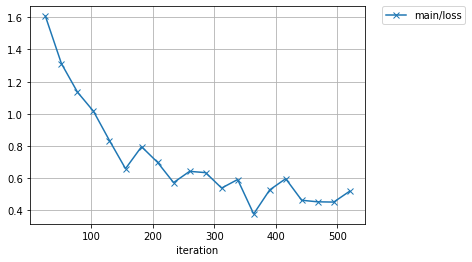

In [14]:
from IPython.display import Image
Image(filename=f"{OUT}/loss.png")

In [15]:
# 学習済みモデルをファイルに書き出す
model_file = f"{OUT}/choco_faster_rcnn.npz"
choco_trainer.save_model(file_name=model_file)

2021-03-23 02:57:03,357 - __main__ - INFO - output model as npz_file: ../out/choco_faster_rcnn.npz
